In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('loan_dataset_investor.csv')
df.head()

loan_id  country    loan_issued_at  \
0  260FB2E2-8612-4763-B7B1-B36300920BD5  Finland  25/09/2025 08:56   
1  40B2AA74-E887-4E7C-A320-B20F013F62A2  Finland  20/10/2024 19:27   
2  4A8CB94A-5E70-4919-A0C1-B22D00DEE6E7  Finland  19/11/2024 13:33   
3  5247E7B9-67A1-40C4-A080-AAD600C37593    Spain  28/09/2019 11:54   
4  566F0EC7-1334-4C9B-9F4E-AC1B00BF8FD6  Estonia  18/08/2020 11:45   

  early_repaid_at is_early_repaid_within_14_days  issued_amount loan_status  \
0             NaN                            NaN          200.0      Active   
1             NaN                            NaN         4249.0      Active   
2             NaN                            NaN          207.0      Active   
3             NaN                            NaN         4253.0      Repaid   
4             NaN                            NaN         1063.0      Repaid   

  loan_last_recorded_action_date_local  initial_interest_rate  nr_of_payments  \
0                                  NaN                 0.1748              78   
1                                  NaN                 0.1877              15   
2                                  NaN                 0.1877              49   
3                           21/07/2025                 0.2620              51   
4                           20/08/2025                 0.3586              60   

   ...  days_past_due_principal  months_in_default  months_on_book  \
0  ...                      NaN                NaN             0.0   
1  ...                      NaN                NaN            12.0   
2  ...                      NaN                NaN            11.0   
3  ...                   1505.0                NaN            24.0   
4  ...                      NaN                NaN            60.0   

   loan_status_risk  repaid_amount_total  initial_loan_duration  \
0            Active                 2.32                     78   
1            Active              2444.13                     60   
2            Active                91.15                     12   
3       Written Off              4399.03                     36   
4           Paid Up              2503.64                     60   

   combined_income has_default_within_12_months  projected_npv_return  \
0          1842.36                          NaN              0.016153   
1          1045.76                          NaN              0.108182   
2          2189.57                          NaN              0.147670   
3              NaN                          0.0                   NaN   
4              NaN                          0.0                   NaN   

  customer_risk_rating  
0                    D  
1                    C  
2                    A  
3                  NaN  
4                  NaN  

[5 rows x 31 columns]

In [4]:
print("Original shape of the dataset:", df.shape)

Original shape of the dataset: (644037, 31)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644037 entries, 0 to 644036
Data columns (total 31 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   loan_id                               644037 non-null  object 
 1   country                               644037 non-null  object 
 2   loan_issued_at                        644037 non-null  object 
 3   early_repaid_at                       177106 non-null  object 
 4   is_early_repaid_within_14_days        177106 non-null  object 
 5   issued_amount                         644037 non-null  float64
 6   loan_status                           644037 non-null  object 
 7   loan_last_recorded_action_date_local  261815 non-null  object 
 8   initial_interest_rate                 644037 non-null  float64
 9   nr_of_payments                        644037 non-null  int64  
 10  principal_balance                     636324 non-null  float64
 11  

In [6]:
df.tail()

loan_id  country loan_issued_at  \
644032  F85282DF-15EF-4F65-B6BF-AE0100DECF7E  Estonia     17/12/2021   
644033  0D4CEBF6-FBA3-4F69-802D-AFD000B6B3C7  Finland     25/03/2023   
644034  4145595D-3578-491C-9E96-AB3E00AAACCB  Estonia     10/01/2020   
644035  751DC4ED-F31F-4F6E-9FFE-B173006E98DE  Finland     17/05/2024   
644036  96C83352-A5B2-4E28-9D28-AACE01522AC4  Estonia     20/09/2019   

       early_repaid_at is_early_repaid_within_14_days  issued_amount  \
644032     44734.44131                          False         2126.0   
644033             NaN                            NaN         4146.0   
644034     43840.50997                           True          531.0   
644035             NaN                            NaN          725.0   
644036     44753.29041                          False          531.0   

       loan_status loan_last_recorded_action_date_local  \
644032      Repaid                              44734.0   
644033   Defaulted                                  NaN   
644034      Repaid                              43840.0   
644035      Active                                  NaN   
644036      Repaid                              44753.0   

        initial_interest_rate  nr_of_payments  ...  days_past_due_principal  \
644032                 0.1085               7  ...                      NaN   
644033                 0.1927             120  ...                    387.0   
644034                 0.1000               1  ...                      NaN   
644035                 0.1850              18  ...                      NaN   
644036                 0.1235               2  ...                      NaN   

        months_in_default  months_on_book  loan_status_risk  \
644032                NaN             6.0           Paid Up   
644033               12.0            18.0         Defaulted   
644034                NaN             NaN         Cancelled   
644035                NaN            17.0            Active   
644036                NaN            34.0           Paid Up   

        repaid_amount_total  initial_loan_duration  combined_income  \
644032              2283.13                     60              NaN   
644033              1218.46                     60          4807.78   
644034               531.00                     60              NaN   
644035               790.24                     18          1437.44   
644036               732.91                     60              NaN   

       has_default_within_12_months  projected_npv_return customer_risk_rating  
644032                          0.0                   NaN                  NaN  
644033                          0.0              0.114837                  NaN  
644034                          0.0                   NaN                  NaN  
644035                          0.0              0.144697                    A  
644036                          0.0                   NaN                  NaN  

[5 rows x 31 columns]

In [7]:
print("Columns:", len(df.columns))
print(df.dtypes.value_counts())

Columns: 31
float64    17
object     12
int64       2
Name: count, dtype: int64


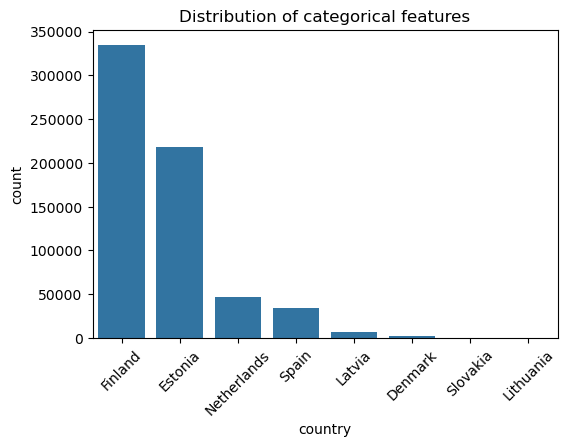

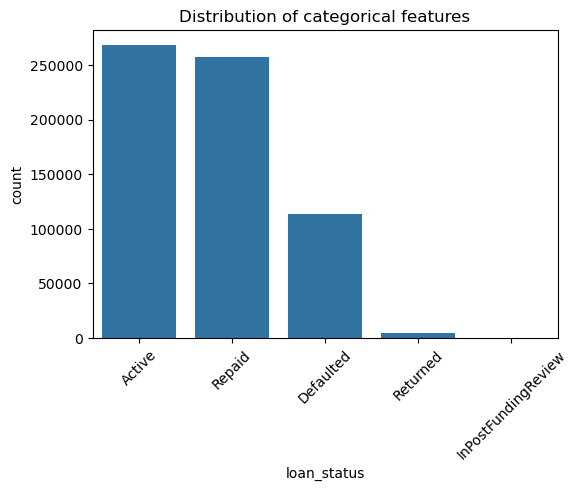

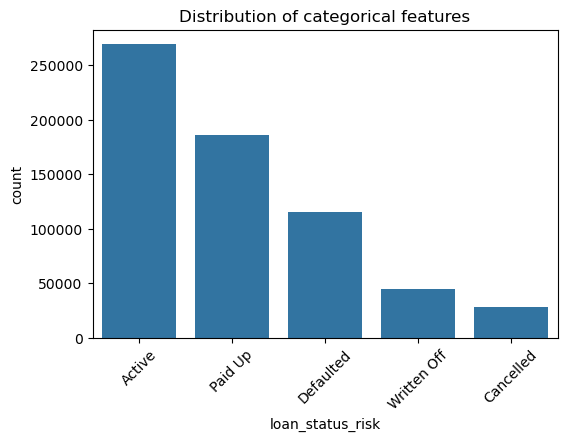

In [8]:
#categorical distributions (how many categorical features)
categorical_cols = ['country', 'loan_status', 'loan_status_risk']

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f"Distribution of categorical features")
        plt.xticks(rotation=45)
        plt.show()

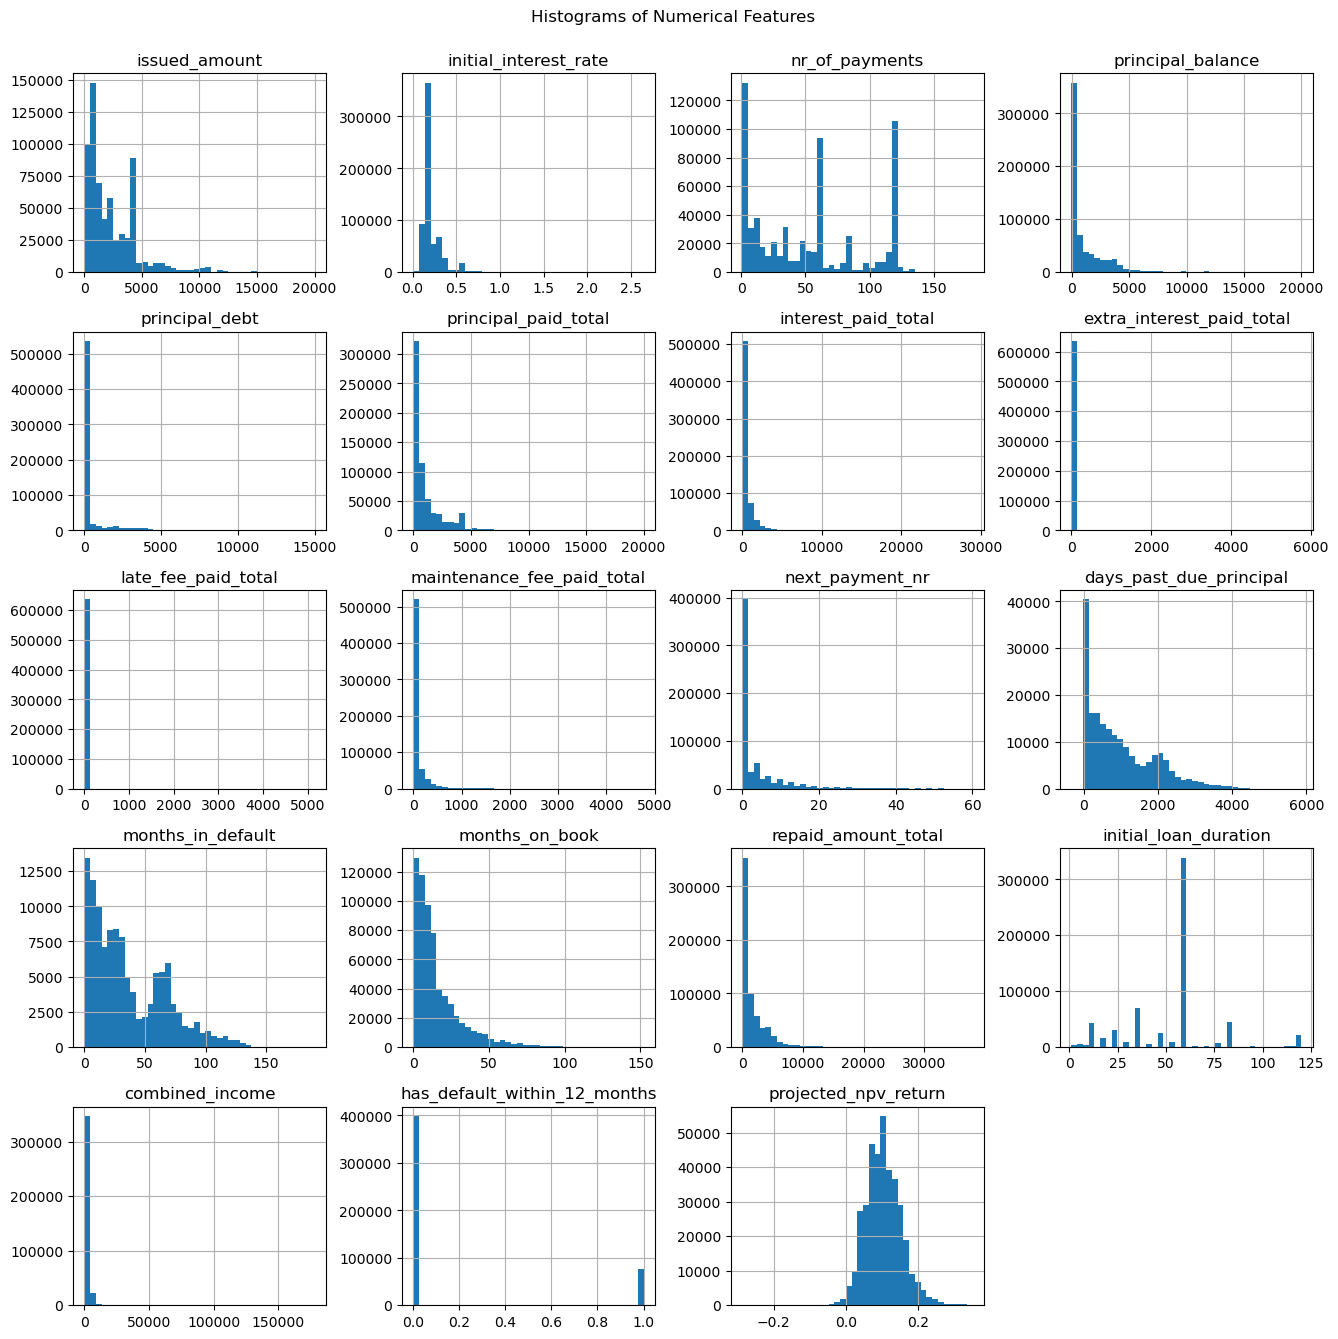

In [9]:
#numerical distribution (how many numerical features)
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(figsize=(16, 16), bins=40)
plt.suptitle("Histograms of Numerical Features", y=0.92)
plt.show()

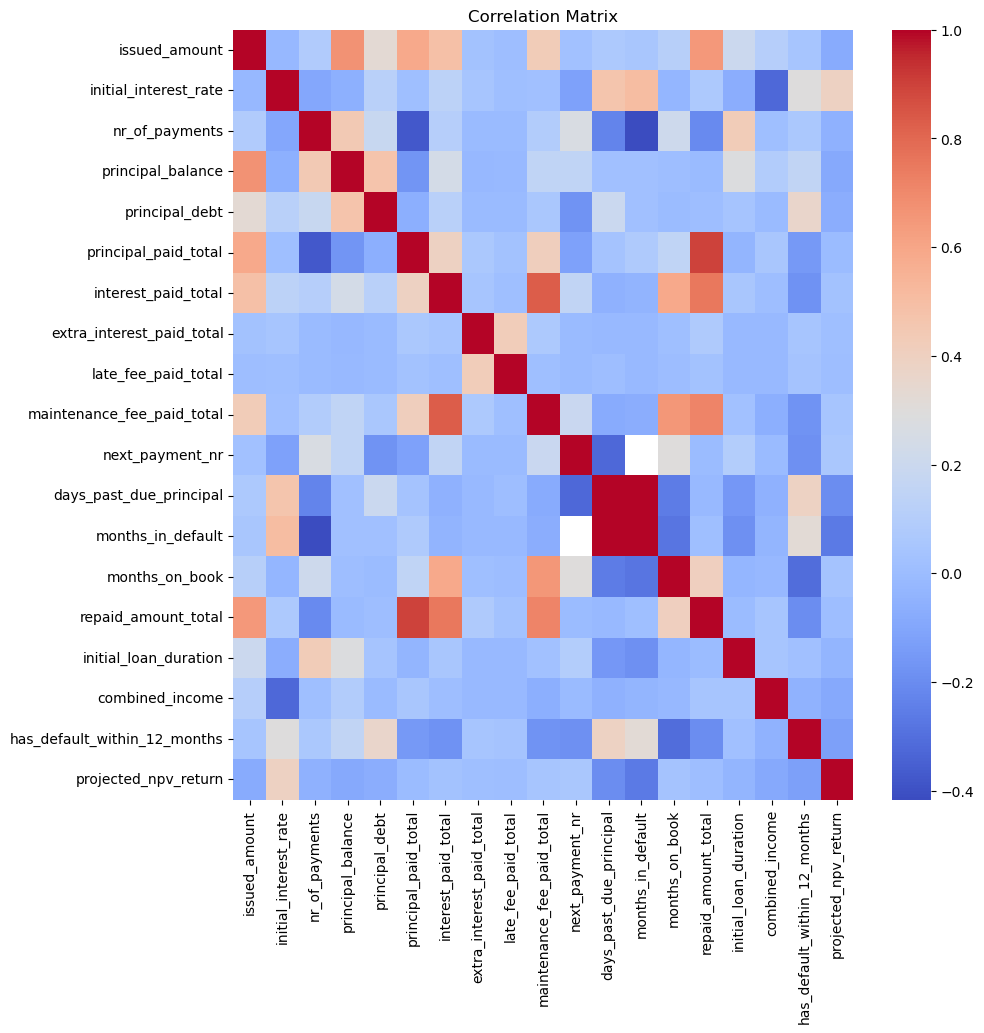

In [10]:
#correlation matrix
plt.figure(figsize=(10,10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [11]:
df.isnull().sum()

loan_id                                      0
country                                      0
loan_issued_at                               0
early_repaid_at                         466931
is_early_repaid_within_14_days          466931
issued_amount                                0
loan_status                                  0
loan_last_recorded_action_date_local    382222
initial_interest_rate                        0
nr_of_payments                               0
principal_balance                         7713
principal_debt                            7713
principal_paid_total                      7713
interest_paid_total                       7713
extra_interest_paid_total                 7713
late_fee_paid_total                       7713
maintenance_fee_paid_total                7713
is_default                                7713
next_payment_nr                           7713
next_payment_date_local                 367275
debt_occured_date_local                 452785
days_past_due

In [12]:
missing = df.isnull().mean().sort_values(ascending=False)
missing.head(20)

months_in_default                       0.820923
is_early_repaid_within_14_days          0.725006
early_repaid_at                         0.725006
debt_occured_date_local                 0.703042
days_past_due_principal                 0.703042
loan_last_recorded_action_date_local    0.593478
next_payment_date_local                 0.570270
customer_risk_rating                    0.525728
combined_income                         0.424128
projected_npv_return                    0.422775
has_default_within_12_months            0.262156
months_on_book                          0.012710
principal_debt                          0.011976
principal_balance                       0.011976
principal_paid_total                    0.011976
interest_paid_total                     0.011976
maintenance_fee_paid_total              0.011976
is_default                              0.011976
next_payment_nr                         0.011976
late_fee_paid_total                     0.011976
dtype: float64

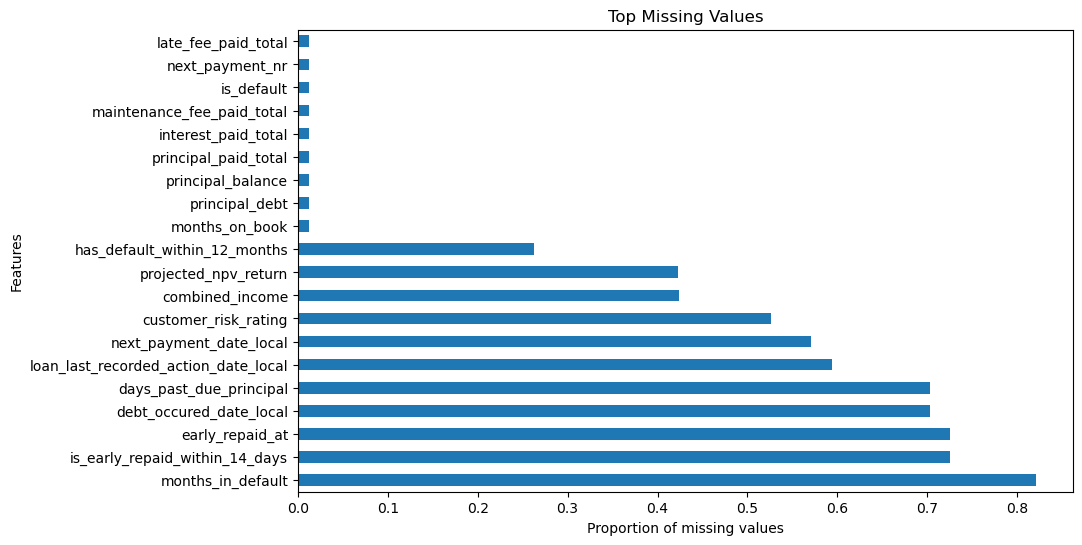

In [13]:
plt.figure(figsize=(10,6))
missing.head(20).plot(kind='barh')
plt.title("Top Missing Values")
plt.xlabel("Proportion of missing values")
plt.ylabel("Features")
plt.show()

In [14]:
df.describe()

issued_amount  initial_interest_rate  nr_of_payments  \
count  644037.000000          644037.000000   644037.000000   
mean     2264.764752               0.222996       51.596283   
std      2202.358569               0.145096       43.130837   
min         6.390000               0.010000        1.000000   
25%       531.000000               0.174800        9.000000   
50%      1554.000000               0.187700       48.000000   
75%      3721.000000               0.230800       84.000000   
max     20000.000000               2.643100      180.000000   

       principal_balance  principal_debt  principal_paid_total  \
count      636324.000000   636324.000000         636324.000000   
mean         1118.407772      382.579212           1069.753570   
std          1797.572217     1101.286345           1568.460186   
min           -34.200000        0.000000              0.000000   
25%             0.000000        0.000000             97.760000   
50%           290.610000        0.000000            479.440000   
75%          1649.400000        0.000000           1309.907500   
max         20000.000000    15000.000000          19989.000000   

       interest_paid_total  extra_interest_paid_total  late_fee_paid_total  \
count        636324.000000              636324.000000        636324.000000   
mean            489.320367                   1.274490             0.496992   
std             915.964658                  29.419091            21.856088   
min               0.000000                   0.000000             0.000000   
25%              34.480000                   0.000000             0.000000   
50%             164.210000                   0.000000             0.000000   
75%             566.892500                   0.000000             0.000000   
max           28934.820000                5755.770000          5154.160000   

       maintenance_fee_paid_total  next_payment_nr  days_past_due_principal  \
count               636324.000000    636324.000000            191252.000000   
mean                    82.113585         3.534548               962.428796   
std                    193.470774         6.952660               907.689423   
min                      0.000000         0.000000              -334.000000   
25%                      0.000000         0.000000               204.000000   
50%                     10.060000         0.000000               706.000000   
75%                     72.800000         4.000000              1559.000000   
max                   4771.160000        60.000000              5866.000000   

       months_in_default  months_on_book  repaid_amount_total  \
count      115332.000000   635851.000000        636324.000000   
mean           36.295616       15.195702          1642.462012   
std            30.369172       15.848199          2240.282156   
min             0.000000        0.000000             0.000000   
25%            11.000000        4.000000           218.420000   
50%            28.000000       10.000000           742.205000   
75%            60.000000       20.000000          2215.022500   
max           190.000000      152.000000         37946.840000   

       initial_loan_duration  combined_income  has_default_within_12_months  \
count          644037.000000    370883.000000                 475199.000000   
mean               53.632762      2543.799355                      0.161189   
std                23.513078      1637.827796                      0.367706   
min                 1.000000         0.000000                      0.000000   
25%                36.000000      1669.420000                      0.000000   
50%                60.000000      2322.190000                      0.000000   
75%                60.000000      3033.460000                      0.000000   
max               120.000000    177871.700000                      1.000000   

       projected_npv_return  
count         371754.000000  
mean               0.103826  
std                0.050781  
min        

In [15]:
# Define target variable
target = "has_default_within_12_months"

# Inspect distribution
df[target].value_counts(dropna=False)
df[target].value_counts(normalize=True)


has_default_within_12_months
0.0    0.838811
1.0    0.161189
Name: proportion, dtype: float64

In [16]:
# DATA CLEANING & PREPROCESSING

drop_cols = [
    "loan_id", "early_repaid_at", "is_early_repaid_within_14_days",
    "loan_last_recorded_action_date_local", "next_payment_date_local",
    "debt_occured_date_local"
]
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True)

# Parse dates
if "loan_issued_at" in df.columns:
    df["loan_issued_at"] = pd.to_datetime(df["loan_issued_at"], errors="coerce", dayfirst=True)
    df["loan_year"] = df["loan_issued_at"].dt.year
    df["loan_month"] = df["loan_issued_at"].dt.month
    df["loan_day"] = df["loan_issued_at"].dt.day
    df.drop(columns=["loan_issued_at"], inplace=True)

# TARGET VARIABLE 
target = "has_default_within_12_months"
df[target] = df[target].fillna(0).astype(int)


In [17]:
# Identify numeric + categorical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols = [c for c in num_cols if c != target] 

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Fill missing values in numeric features with median
for col in num_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Fill missing values in categorical features with most frequent value
for col in cat_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])


In [18]:
df.head()

country  issued_amount loan_status  initial_interest_rate  nr_of_payments  \
0  Finland          200.0      Active                 0.1748              78   
1  Finland         4249.0      Active                 0.1877              15   
2  Finland          207.0      Active                 0.1877              49   
3    Spain         4253.0      Repaid                 0.2620              51   
4  Estonia         1063.0      Repaid                 0.3586              60   

   principal_balance  principal_debt  principal_paid_total  \
0             198.61             0.0                  1.39   
1            2421.03             0.0               1827.97   
2             141.99             0.0                 65.01   
3               0.00             0.0               2683.57   
4               0.00             0.0               1063.00   

   interest_paid_total  extra_interest_paid_total  ...  loan_status_risk  \
0                 0.77                       0.00  ...            Active   
1               616.16                       0.00  ...            Active   
2                26.14                       0.00  ...            Active   
3              1442.01                       2.14  ...       Written Off   
4              1228.39                       0.68  ...           Paid Up   

   repaid_amount_total  initial_loan_duration  combined_income  \
0                 2.32                     78          1842.36   
1              2444.13                     60          1045.76   
2                91.15                     12          2189.57   
3              4399.03                     36          2322.19   
4              2503.64                     60          2322.19   

   has_default_within_12_months  projected_npv_return  customer_risk_rating  \
0                             0              0.016153                     D   
1                             0              0.108182                     C   
2                             0              0.147670                     A   
3                             0              0.101911                    AA   
4                             0              0.101911                    AA   

  loan_year  loan_month  loan_day  
0    2025.0         9.0      25.0  
1    2024.0        10.0      20.0  
2    2024.0        11.0      19.0  
3    2019.0         9.0      28.0  
4    2020.0         8.0      18.0  

[5 rows x 27 columns]

In [19]:
# Separate X and y
X = df.drop(columns=[target])
y = df[target]

In [20]:
#Keep only features known at loan issuance
relevant_features = [
    'country',
    'issued_amount',
    'initial_interest_rate',
    'nr_of_payments',
    'initial_loan_duration',
    'combined_income',
    'projected_npv_return',
    'loan_year',
    'loan_month',
    'loan_day',
    'customer_risk_rating',
]
# Filter only features that actually exist in df
relevant_features = [f for f in relevant_features if f in X.columns]
X_clean = X[relevant_features]

In [21]:
def clean_all_numeric(df):
    for col in df.columns:
        # Remove brackets, quotes
        df[col] = df[col].astype(str).str.replace(r"[\[\]\'\"]", "", regex=True)
        # Convert numeric-like strings to float where possible
        try:
            df[col] = pd.to_numeric(df[col], errors='ignore')
        except:
            pass
    return df

X_clean = clean_all_numeric(X_clean)

In [23]:
# clean dataset
new_df = pd.concat([X_clean, y], axis=1)
new_df.to_csv("cleaned_bondora_dataset.csv", index=False)

print(" dataset saved successfully!")
print(new_df.head())

 dataset saved successfully!
   country  issued_amount  initial_interest_rate  nr_of_payments  \
0  Finland          200.0                 0.1748              78   
1  Finland         4249.0                 0.1877              15   
2  Finland          207.0                 0.1877              49   
3    Spain         4253.0                 0.2620              51   
4  Estonia         1063.0                 0.3586              60   

   initial_loan_duration  combined_income  projected_npv_return  loan_year  \
0                     78          1842.36              0.016153     2025.0   
1                     60          1045.76              0.108182     2024.0   
2                     12          2189.57              0.147670     2024.0   
3                     36          2322.19              0.101911     2019.0   
4                     60          2322.19              0.101911     2020.0   

   loan_month  loan_day customer_risk_rating  has_default_within_12_months  
0         9.0   

In [24]:
#Define numeric + categorical columns
numeric_cols = [col for col in X_clean.select_dtypes(include=['number']).columns]
categorical_cols = [col for col in X_clean.select_dtypes(include=['object']).columns]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['issued_amount', 'initial_interest_rate', 'nr_of_payments', 'initial_loan_duration', 'combined_income', 'projected_npv_return', 'loan_year', 'loan_month', 'loan_day']
Categorical columns: ['country', 'customer_risk_rating']


In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.3, random_state=42, stratify=y
)


In [27]:
!pip install imblearn

In [28]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

#Logistic Regression pipeline with SMOTE
LR_pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=2000, random_state=42))
])

#Random Forest pipeline with SMOTE
RF_pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42))
])

  File "C:\Users\acer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\acer\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\subprocess.py",

Optimal threshold based on F1-score: 0.64
Classification Report (Threshold Tuned):
              precision    recall  f1-score   support

           0       0.92      0.88      0.90    170233
           1       0.34      0.46      0.39     22979

    accuracy                           0.83    193212
   macro avg       0.63      0.67      0.65    193212
weighted avg       0.85      0.83      0.84    193212

ROC-AUC: 0.7932032030979361


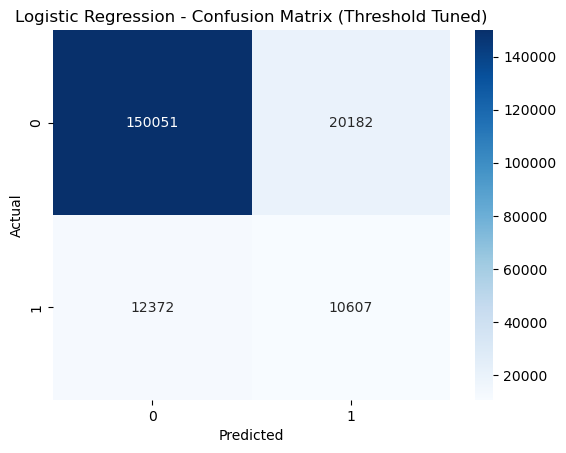

In [29]:
# Logistic Regression
# Fit pipeline
LR_pipe.fit(X_train, y_train)

# Predictions
LR_prob = LR_pipe.predict_proba(X_test)[:,1]

# Tune threshold based on F1-score
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, LR_prob)
f1_scores = 2 * precisions * recalls / (precisions + recalls)
best_idx = np.argmax(f1_scores[:-1])  # safer
best_threshold = thresholds[best_idx]
print(f"Optimal threshold based on F1-score: {best_threshold:.2f}")

#Predict using tuned threshold
LR_preds_tuned = (LR_prob >= best_threshold).astype(int)

#Evaluate
print("Classification Report (Threshold Tuned):")
print(classification_report(y_test, LR_preds_tuned))

roc_auc = roc_auc_score(y_test, LR_prob)
print("ROC-AUC:", roc_auc)

#Confusion matrix
sns.heatmap(confusion_matrix(y_test, LR_preds_tuned), annot=True, fmt='d', cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix (Threshold Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Accuracy: 0.8873931225803781
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94    170233
           1       0.52      0.58      0.55     22979

    accuracy                           0.89    193212
   macro avg       0.73      0.75      0.74    193212
weighted avg       0.89      0.89      0.89    193212

ROC-AUC: 0.9065413158037557


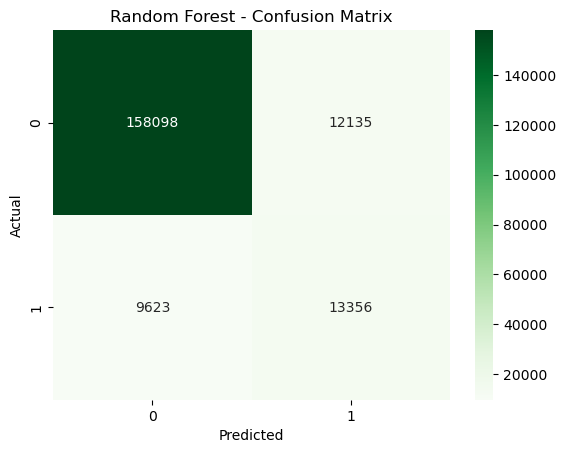

In [30]:
# Random Forest
# Fit pipeline
RF_pipe.fit(X_train, y_train)

# Predictions
RF_preds = RF_pipe.predict(X_test)
RF_prob = RF_pipe.predict_proba(X_test)[:,1]

# Evaluate
print("Random Forest Accuracy:", RF_pipe.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, RF_preds))

#ROC-AUC
roc_auc = roc_auc_score(y_test, RF_prob)
print("ROC-AUC:", roc_auc)

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, RF_preds), annot=True, fmt='d', cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [31]:
from xgboost import XGBClassifier

# XGBoost Pipeline
XGB_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()  # handles imbalance
    ))
])

print("XGBoost pipeline created successfully.")


XGBoost pipeline created successfully.


XGBoost Evaluation
              precision    recall  f1-score   support

           0       0.98      0.79      0.87    170233
           1       0.36      0.89      0.51     22979

    accuracy                           0.80    193212
   macro avg       0.67      0.84      0.69    193212
weighted avg       0.91      0.80      0.83    193212

ROC-AUC: 0.917265690501462


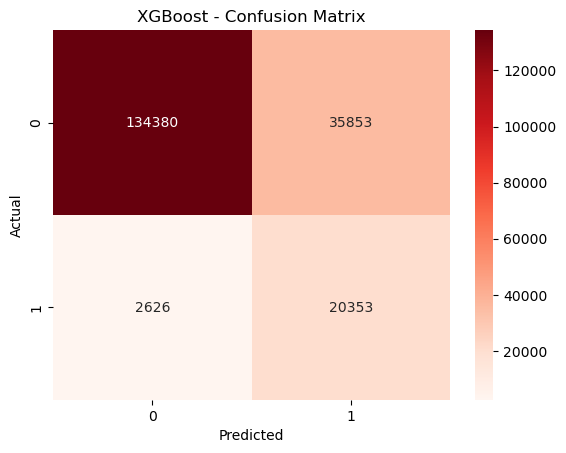

In [32]:
XGB_pipe.fit(X_train, y_train)
XGB_preds = XGB_pipe.predict(X_test)
XGB_prob = XGB_pipe.predict_proba(X_test)[:,1]

# Classification report
print("XGBoost Evaluation")
print(classification_report(y_test, XGB_preds))

# ROC-AUC
roc_auc = roc_auc_score(y_test, XGB_prob)
print("ROC-AUC:", roc_auc)

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, XGB_preds), annot=True, fmt='d', cmap="Reds")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
!pip install shap

In [34]:
# Extract feature names after preprocessing
num_features = numeric_cols
cat_features = list(LR_pipe.named_steps['preprocess']
                    .named_transformers_['cat']
                    .get_feature_names_out(categorical_cols))

feature_names = num_features + cat_features

# Now get coefficients
lr_coef = LR_pipe.named_steps['model'].coef_[0]

# Combine into DataFrame
lr_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_coef
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Logistic Regression Feature Importance:")
print(lr_importance.head(10))


Logistic Regression Feature Importance:
                   Feature  Coefficient
9          country_Denmark    -3.547611
15        country_Slovakia     1.489583
16           country_Spain     1.050518
17  customer_risk_rating_A    -0.957496
23  customer_risk_rating_F     0.704623
19  customer_risk_rating_B    -0.591053
1    initial_interest_rate     0.555443
6                loan_year    -0.484708
12          country_Latvia     0.472761
14     country_Netherlands    -0.469666


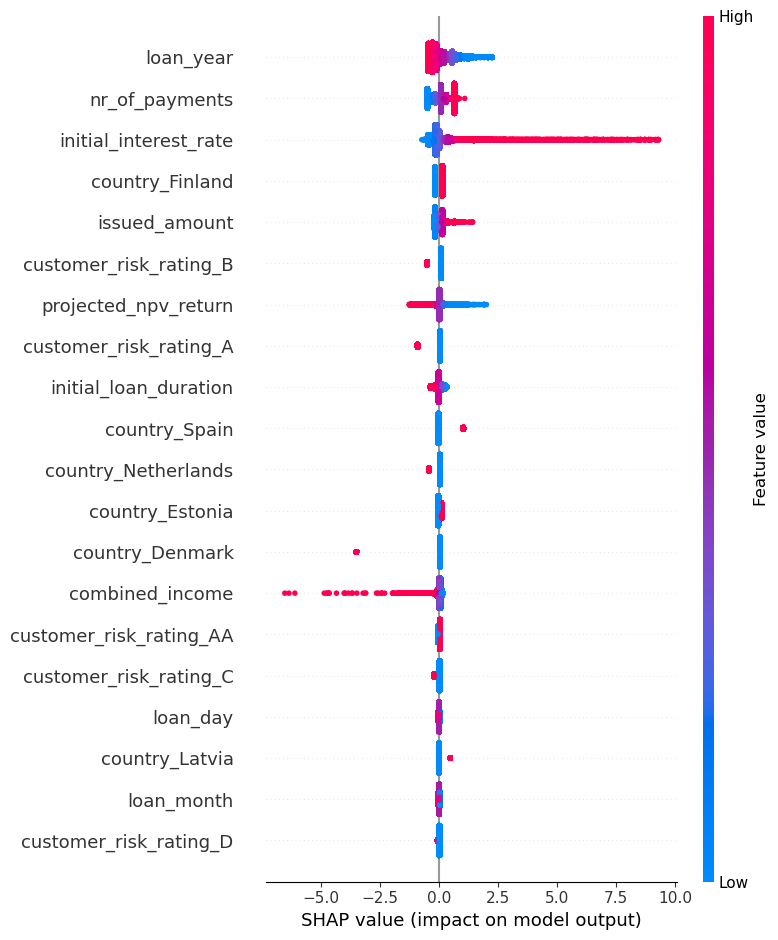

In [35]:
import shap

# Extract trained logistic regression model
lr_model = LR_pipe.named_steps['model']

# Preprocess X_train and X_test to match pipeline input
X_train_enc = LR_pipe.named_steps['preprocess'].transform(X_train)
X_test_enc = LR_pipe.named_steps['preprocess'].transform(X_test)

# Use LinearExplainer with correct feature_perturbation
explainer_lr = shap.LinearExplainer(lr_model, X_train_enc, feature_perturbation="interventional")
shap_values_lr = explainer_lr.shap_values(X_test_enc)

# Plot summary
shap.summary_plot(shap_values_lr, X_test_enc, feature_names=numeric_cols + 
                  list(LR_pipe.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(categorical_cols)))



In [36]:
# Extract the trained Random Forest from the pipeline
rf_model = RF_pipe.named_steps['model']

# Numeric features remain the same
num_features = numeric_cols

# Categorical features after one-hot encoding
cat_features = list(RF_pipe.named_steps['preprocess']
                    .named_transformers_['cat']
                    .get_feature_names_out(categorical_cols))

# Combine all feature names
feature_names = num_features + cat_features
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Random Forest Feature Importance:")
print(rf_importance.head(10))


Top 10 Random Forest Feature Importance:
                  Feature  Importance
2          nr_of_payments    0.285690
6               loan_year    0.131956
1   initial_interest_rate    0.127040
8                loan_day    0.083033
0           issued_amount    0.081734
7              loan_month    0.069724
5    projected_npv_return    0.060220
3   initial_loan_duration    0.049743
4         combined_income    0.045227
16          country_Spain    0.019204


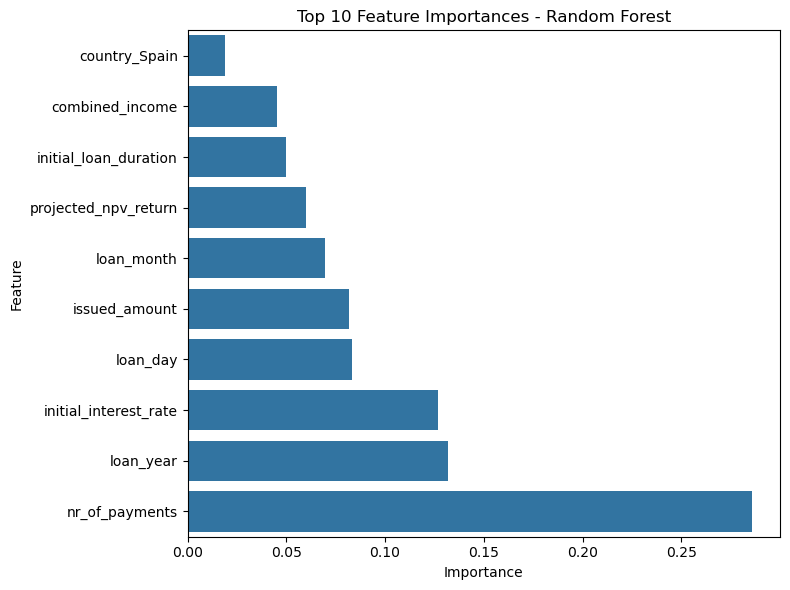

In [37]:
top10 = rf_importance.head(10).sort_values(by='Importance', ascending=True)
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=top10)
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [38]:
# Extract the trained XGBoost model from the pipeline
xgb_model = XGB_pipe.named_steps['model']

# Numeric features
num_features = numeric_cols

# Categorical one-hot encoded features
cat_features = (
    XGB_pipe.named_steps['preprocess']
    .named_transformers_['cat']
    .get_feature_names_out(categorical_cols)
)

# Combine all feature names
feature_names = list(num_features) + list(cat_features)

xgb_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 15 XGBoost Feature Importances:")
print(xgb_importance.head(15))


Top 15 XGBoost Feature Importances:
                    Feature  Importance
6                 loan_year    0.224137
2            nr_of_payments    0.164292
16            country_Spain    0.128571
1     initial_interest_rate    0.105298
10          country_Estonia    0.075180
18  customer_risk_rating_AA    0.054746
5      projected_npv_return    0.036755
17   customer_risk_rating_A    0.034271
3     initial_loan_duration    0.032557
7                loan_month    0.023189
11          country_Finland    0.017123
12           country_Latvia    0.014148
14      country_Netherlands    0.012919
4           combined_income    0.011137
23   customer_risk_rating_F    0.010987


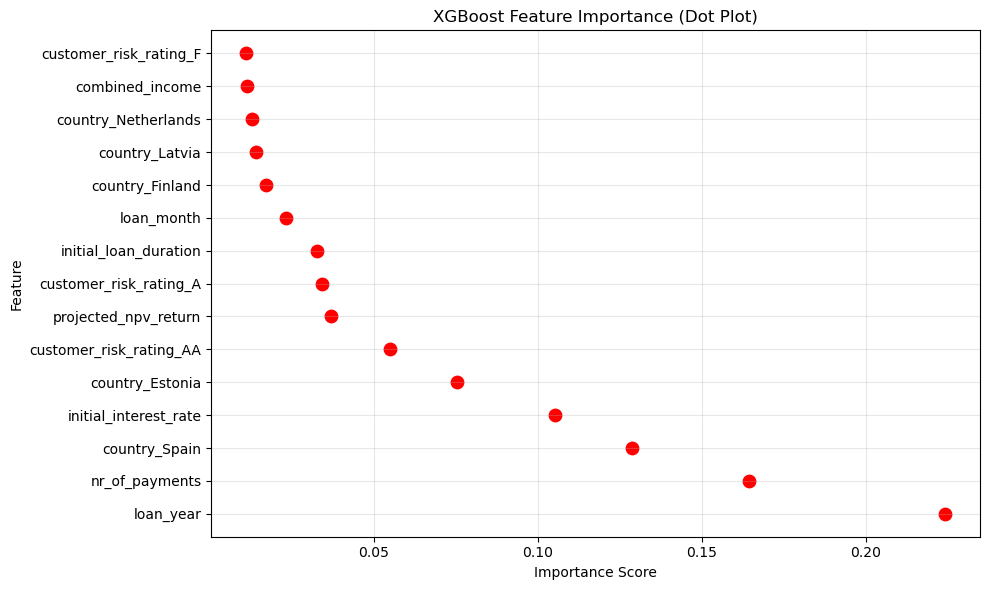

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(
    xgb_importance['Importance'][:15],
    xgb_importance['Feature'][:15],
    s=80,
    color="red"
)
plt.title("XGBoost Feature Importance (Dot Plot)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
print("THANK YOU")

THANK YOU
